In [67]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors.kde import KernelDensity
import matplotlib.pyplot as plt
import math

In [68]:
from numpy import pi
from scipy.linalg import det
def entropy_gaussian(C):
    '''
    Entropy of a gaussian variable with covariance matrix C
    '''
    if np.isscalar(C): # C is the variance
        return .5*(1 + np.log(2*pi)) + .5*np.log(C)
    else:
        n = C.shape[0] # dimension
        return .5*n*(1 + np.log(2*pi)) + .5*np.log(abs(det(C)))

In [69]:
def entropy_Resub(X):
    '''
    resubstitution estimate
    '''
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X[:,None])
    #score_sample returns the Log of the probability density
    logprob = kde.score_samples(X[:,None])
    return -np.mean(logprob)

In [70]:
from sklearn.model_selection import cross_val_score
def entropy_SplitData(X):
    '''
    Splitting Data Estimate with cross validation
    '''
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X[:,None])
    numFold = 5
    TestSize = X.size/5
    return -np.mean(cross_val_score(kde, s1[:,None], cv = 5))/TestSize

In [71]:
def entropy_Integral(X):
    '''
    Integral Estimate using summation
    '''
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X[:,None])
    logprob = kde.score_samples(X[:,None])
    return -np.average(logprob, weights=np.exp(logprob))

In [72]:
mean = 0
stdv = 1
size = 10000
s1 = np.random.normal(mean, stdv, size)

Histogram of the distribution


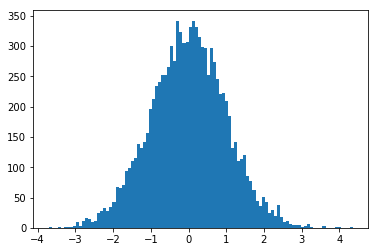

In [73]:
histogram = plt.hist(s1, bins=100)
print ("Histogram of the distribution")
plt.show()

In [74]:
print ("Ground truth of Entropy is:")
print (entropy_gaussian(stdv))

Ground truth of Entropy is:
1.4189385332


In [75]:
print ("Resubstitution estimate of KDE Entropy is:")
print (entropy_Resub(s1))

Resubstitution estimate of KDE Entropy is:
1.42159448041


In [76]:
print ("Splitting Data estimate of KDE Entropy is:")
print (entropy_SplitData(s1))

Splitting Data estimate of KDE Entropy is:
1.42351954623


In [77]:
#Integral Estimate
print ("Integral estimate of KDE Entropy is:")
print (entropy_Integral(s1))

Integral estimate of KDE Entropy is:
1.17427720326


In [78]:
'''
print(s1.size)
#print(s1)
hist1 = np.histogram(s1, bins=100, range=(-60,60), density=True)
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(s1[:,None])
#score_sample returns the Log of the probability density
logprob = kde.score_samples(s1[:,None])
print (logprob.size)
histogram = plt.hist(logprob, bins=100)
plt.show()

'''

"\nprint(s1.size)\n#print(s1)\nhist1 = np.histogram(s1, bins=100, range=(-60,60), density=True)\nkde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(s1[:,None])\n#score_sample returns the Log of the probability density\nlogprob = kde.score_samples(s1[:,None])\nprint (logprob.size)\nhistogram = plt.hist(logprob, bins=100)\nplt.show()\n\n"